# Modelling Solar generation across Multiple Sites

This example shows how `timeserio` helps building deep learning models for time series forecasting. Especially,
we deal with the case of many related timeseries.

We demonstrate some core functionality and concepts, without striving for model accuracy or seeking out additional features like historic weather forecasts.

We will be using the dataset on solar (photo-voltaic, PV) generation potential across Europe, as collected by [SETIS](https://setis.ec.europa.eu/EMHIRES-datasets). The dataset presents solar generation, normalized to the solar capacity installed as of 2015.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files
import os
import os.path
from os import path

In [0]:
from google.colab import files
def upload_1_file():
  uploaded = files.upload()

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    return fn

  return ""


In [0]:
def download_1_file(http_path):
  import requests
  import shutil
  response = requests.get(http_path, stream=True)

  import tempfile
  fname = tempfile.mkstemp()[1]
  
  #print(fname)
  with open(fname, 'wb') as fin:
      shutil.copyfileobj(response.raw, fin)

  return fname # Works!

In [0]:
def download_or_upload_1_file(http_or_file_path):
  if (path.exists(http_or_file_path) and (path.isfile(http_or_file_path))):
    return http_or_file_path

  if (http_or_file_path==""):
    encoder_input_file=upload_1_file()
    return encoder_input_file
  else:
    print(http_or_file_path)
    return download_1_file(http_or_file_path)

## Load the data from parquet

In [0]:
test_path="https://MrYingLee.Github.io/MultiModel/test.parquet"

In [202]:
data_file=download_or_upload_1_file(test_path)

https://MrYingLee.Github.io/MultiModel/test.parquet


In [203]:
%%time
df_test = pd.read_parquet(data_file)

CPU times: user 48.4 ms, sys: 7.99 ms, total: 56.4 ms
Wall time: 32.7 ms


In [0]:
plot_countries = ['ES'] # ['ES', 'UK', 'FI', ]

In [0]:
df_test=df_test[df_test['country'].isin(plot_countries)] # We only test one country

In [206]:
df_test.head(10)

,Time_step,Date,Year,Month,Day,Hour,country,generation
7091376,254209,2015-01-01 00:00:00,2015,1,1,0,ES,0.000000
7091377,254210,2015-01-01 01:00:00,2015,1,1,1,ES,0.000000
7091378,254211,2015-01-01 02:00:00,2015,1,1,2,ES,0.000000
7091379,254212,2015-01-01 03:00:00,2015,1,1,3,ES,0.000000
7091380,254213,2015-01-01 04:00:00,2015,1,1,4,ES,0.000000
7091381,254214,2015-01-01 05:00:00,2015,1,1,5,ES,0.000000
7091382,254215,2015-01-01 06:00:00,2015,1,1,6,ES,0.000000
7091383,254216,2015-01-01 07:00:00,2015,1,1,7,ES,0.000000
7091384,254217,2015-01-01 08:00:00,2015,1,1,8,ES,0.140595
7091385,254218,2015-01-01 09:00:00,2015,1,1,9,ES,0.368293


## To load multimodel

In [0]:
from timeserio.utils.pickle import loadf, dumpf

In [208]:
!pip install timeserio

In [209]:
model_file_path="https://MrYingLee.Github.io/MultiModel/model.pickle"

model_file=download_or_upload_1_file(model_file_path)
model_file

multimodel=loadf(model_file)

https://MrYingLee.Github.io/MultiModel/model.pickle


In [0]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

def vis_model(model, show_shapes=False, show_layer_names=True, rankdir='TB'):
    """Visualize model in a notebook."""
    return SVG(
        model_to_dot(
            model, show_shapes=show_shapes, show_layer_names=show_layer_names, rankdir=rankdir
        ).create(prog='dot', format='svg')
    )

In [211]:
multimodel.multinetwork.model_names

['encoder', 'forecast']

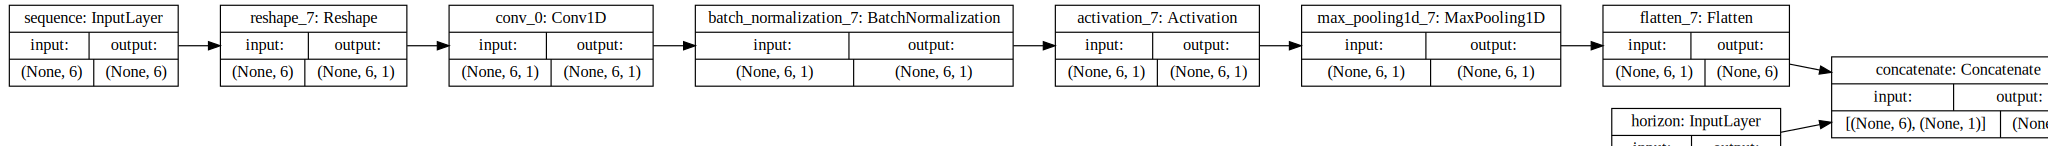

In [212]:
vis_model(multimodel.multinetwork.model["forecast"], show_shapes=True, rankdir="LR")

In [213]:
multimodel.multinetwork.weights

{'encoder': [array([[[1.2862799]]], dtype=float32),
  array([-0.01069735], dtype=float32),
  array([0.9635353], dtype=float32),
  array([0.2514492], dtype=float32),
  array([0.15108357], dtype=float32),
  array([0.06109345], dtype=float32)],
 'forecast': [array([[[1.2862799]]], dtype=float32),
  array([-0.01069735], dtype=float32),
  array([0.9635353], dtype=float32),
  array([0.2514492], dtype=float32),
  array([0.15108357], dtype=float32),
  array([0.06109345], dtype=float32),
  array([[ 0.37674558, -0.69299096,  0.15766162, -0.38274324, -0.11812772,
           0.16316333, -0.11590993, -0.7878848 ],
         [ 0.291856  , -0.04302638, -0.4055402 ,  0.27658978,  0.16002707,
          -0.35782614, -0.45621198, -0.40238425],
         [ 0.246488  ,  0.12667932,  0.07121038,  0.07976387,  0.41237524,
           0.58928645, -0.40972263, -0.56397396],
         [-0.32339808, -0.54589206,  0.08344628,  0.36926416, -0.2969358 ,
          -0.3929164 ,  0.00567013, -0.06762659],
         [ 0.412

## To load multinetwork

After testing, this is not neccesary.

~~~python
network_file_path="https://MrYingLee.Github.io/MultiModel/network.pickle"
network_file=download_or_upload_1_file(network_file_path)
network_file
multinetwork=loadf(network_file)
multinetwork.weights

~~~

## To load weights



After testing, actually the loading weights is not necessary.
```python
weights_file_path="https://MrYingLee.Github.io/MultiModel/weights.pickle"
weights_file=download_or_upload_1_file(weights_file_path)
weights_file

#weights=loadf(weights_file))
#multinetwork.weights=weights 
```


## Evaluate performance on test data
We can evaluate the model on the validation data generator, which can also be out-of-memory:

In [0]:
from timeserio.batches.chunked.pandas import SequenceForecastBatchGenerator

batchgen_test = SequenceForecastBatchGenerator(
    df=df_test, batch_size=2**15,
    sequence_length=6,
    sequence_columns=["generation", "Time_step"],
    last_step_columns=["Time_step"],
    forecast_steps_min=1,
    forecast_steps_max=2,
    batch_offset=False,
    id_column="country",
    batch_aggregator=1
)

In [215]:
batchgen_test.chunks

array(['ES'], dtype=object)

In [216]:
multimodel.evaluate_generator(batchgen_test, model="forecast", verbose=1)

1/1 [==============================] - 0s 152ms/step


[0.002567433286458254, 0.03292470425367355]

## Look at predictions

In [217]:
%%time
test_hat= multimodel.predict_generator(batchgen_test, model="forecast", verbose=5)

CPU times: user 151 ms, sys: 3.96 ms, total: 155 ms
Wall time: 205 ms


In [218]:
test_hat.sum()

223.60886

In [219]:
test_hat.shape

(1459, 1)

In [0]:
import numpy as np
test_hat=np.reshape(test_hat,(test_hat.shape[0]))

In [0]:
df_test_hat=pd.DataFrame({"prediction": test_hat},index=range(test_hat.shape[0]))

In [222]:
df_test.shape

(8760, 8)

In [223]:
df_test_hat.shape

(1459, 1)

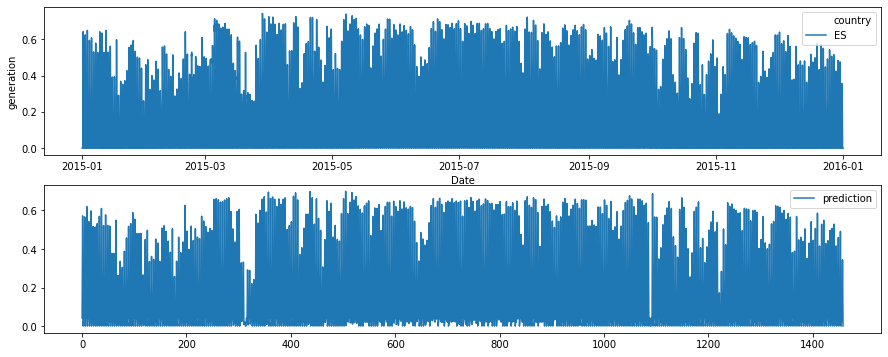

In [224]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 6))
#df_plot = df_test[(df_test['Year'] == 2000) & (df_test['Month'] == 4) & (df_test['Day'] < 15) & (df_test['country'].isin(plot_countries))]

sns.lineplot(
    data=df_test,
    x='Date', y='generation', hue='country',
    ax=axes[0]
)

sns.lineplot(
    data=df_test_hat,
    dashes=True,
    ax=axes[1]
)

While our predictions do not capture short-range weather changes, they are excellent at seasonal level. Remember that all features such as location-specific scaling and time difference has been learned from the data!